## EDA 

In [41]:
#system settings
import sys
sys.path.append("..") # Append source directory to our Python path

#basics
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#misc
# from preprocessing import *
from utils import *

#feature engineering 
from feature_adder import *

#settings
color = sns.color_palette()

In [104]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [43]:

print ('The size of the train set is {} and the size of the test set is {}'.format(train.shape, test.shape))

The size of the train set is (159571, 8) and the size of the test set is (153164, 2)


### Note: 
In the next lines, we will create an new class called **'clean'**. *If* a comment is not classified as 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', or any combination of them, *then* it is classified as 'clean'.

In [111]:
train.loc[:, classes].sum()

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean            143346.0
dtype: float64

In [105]:
classes = TAGS #The 6 given classes 
x = train.loc[:, classes].sum()
#marking comments without any tags as "clean"
if 'clean' not in train.columns:
    rowsums = train.iloc[:,2:].sum(axis=1)
    train['clean'] = (rowsums==0)
    #count number of clean entries
    clean = train['clean'].sum()
else:
    pass
print("Total comments = ", len(train))
print("Total clean comments = ", clean)
print("Total tags excluding the 'clean' comments =", x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags excluding the 'clean' comments = 35098


In [106]:
print("Check for missing values in Train dataset")
null_check = train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check = test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


### Plot the number of occurences for the different classes of the data and the class 'clean' that we have created

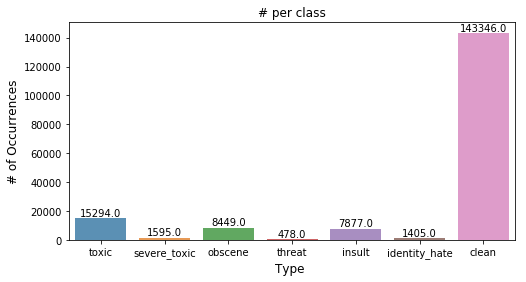

In [107]:
classes = TAGS + ['clean'] #The 6 given classes and the 'clean' class
x=train.loc[:,classes].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

### Heatmap of the 6 given classes and the 'clean' class

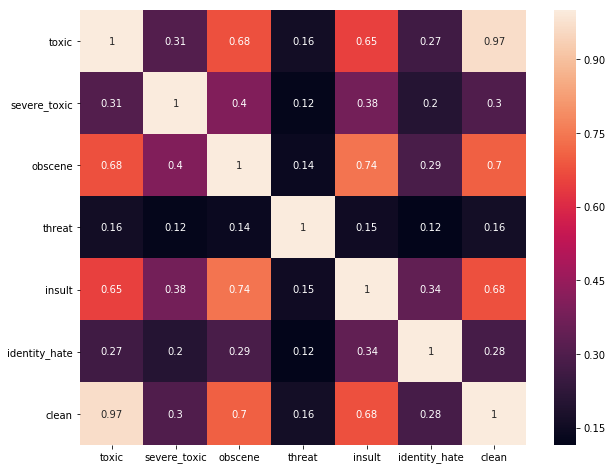

In [108]:
classes = TAGS + ['clean'] #The 6 given classes and the 'clean' class
temp_df = train.loc[:, classes]
corr = temp_df.corr() 
plt.figure(figsize=(10,8))
sns.heatmap(abs(corr),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True
           )
plt.show()

#### High correllation between: 
- Obsence and toxic
- Obsence and insult
- Toxic and insult

        

### Count of the different combinations

In [109]:
columns = TAGS
counts_of_vector = train.groupby(['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])['toxic'].value_counts()
counts_of_vector.to_dict()
counts_of_vector

severe_toxic  obscene  threat  insult  identity_hate  toxic
0             0        0       0       0              0        143346
                                                      1          5666
                                       1              1           136
                                                      0            54
                               1       0              1          1215
                                                      0           301
                                       1              1           134
                                                      0            28
                       1       0       0              1           113
                                                      0            22
                                       1              1             7
                               1       0              1            16
                                                      0             3
                              

### Correlation matrix with the new features

In [71]:
df = FeatureAdder(upper_case=True, word_count=True, unique_words_count=True,
                      letter_count=True, punctuation_count=True, little_case=True,
                      stopwords=True, question_or_exclamation=True)

df_train, df_test = df.add_features(train, test)

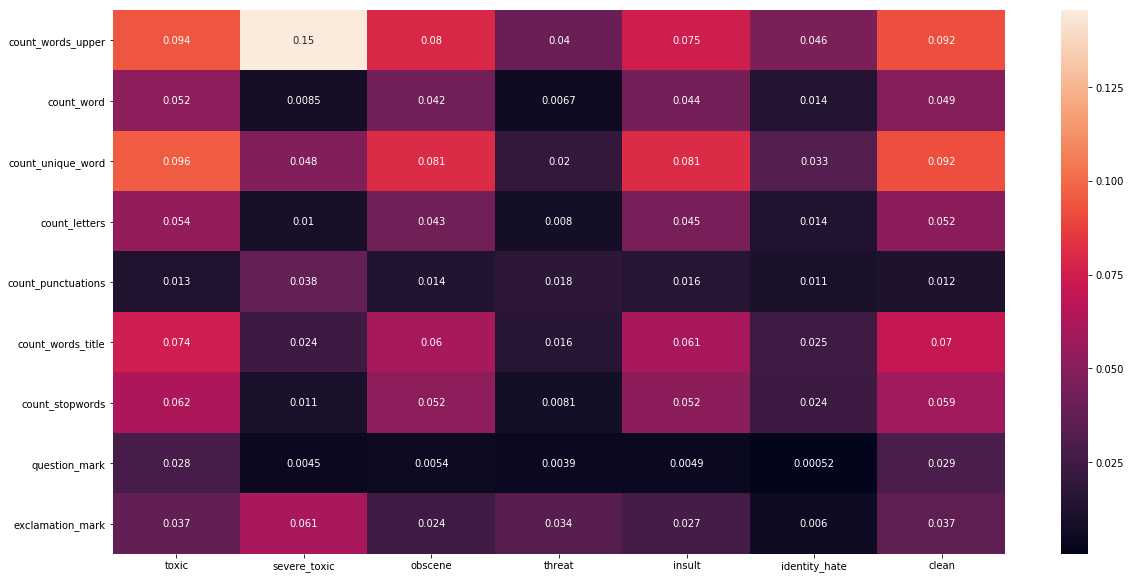

In [99]:
x_variables = TAGS + ['clean'] #Choose the variables to correlate and plot on the x-axis
#Choose the variables to correalte and plot on the y-axis
y_variables = ['count_words_upper', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_title', 'count_stopwords', 'question_mark',
       'exclamation_mark'
              ]
corr = df_train.corr()
corr = corr.loc[y_variables, x_variables]
plt.figure(figsize=(20,10))
sns.heatmap(abs(corr),
            xticklabels=x_variables,
            yticklabels=y_variables, 
            annot=True
           )
plt.show()